In [148]:
import pandas as pd
#we use pandas to manuplate folders
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#we use matplotlib for ploting

In [149]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [150]:
import pandas as pd
df = pd.read_csv('penguins_size.csv')


In [151]:
#printing the top five and last five statements
print(df.head)

<bound method NDFrame.head of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body

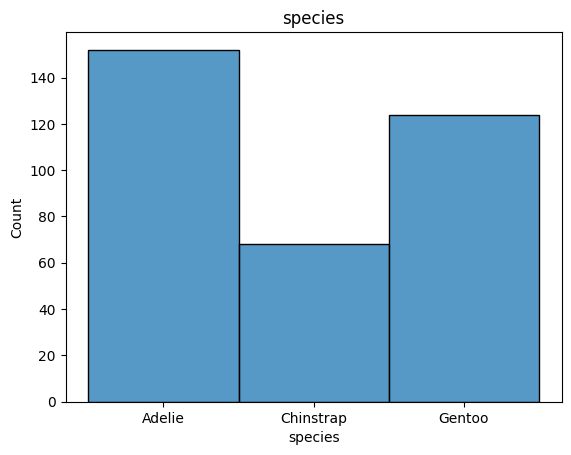

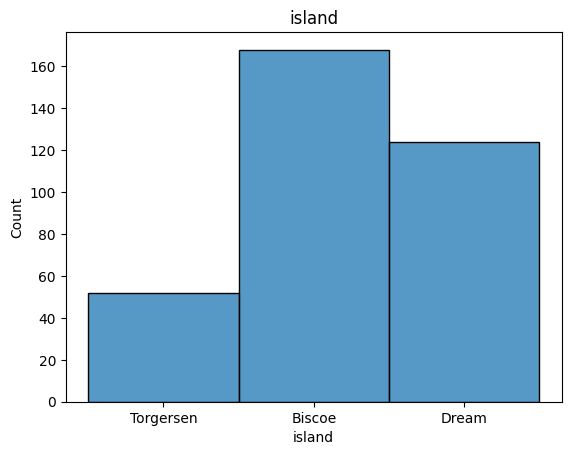

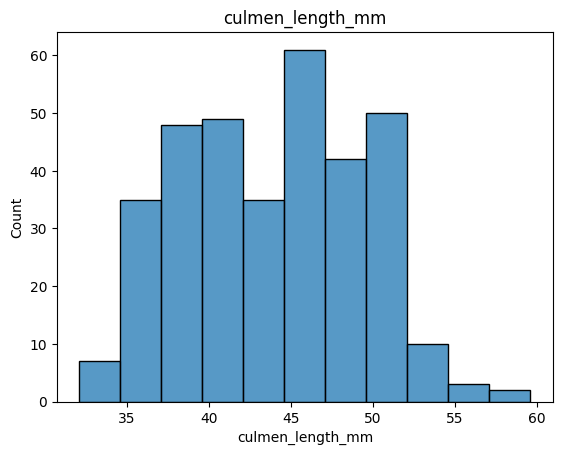

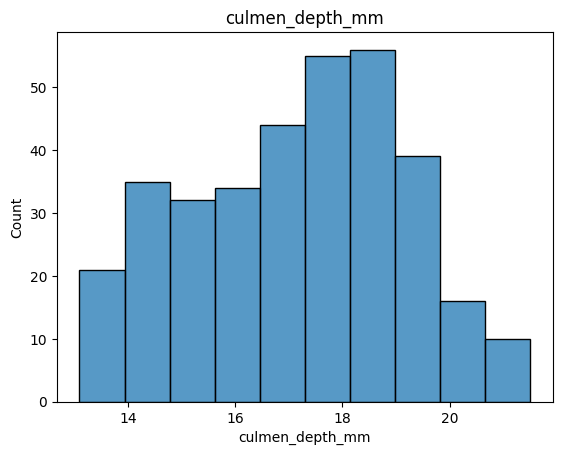

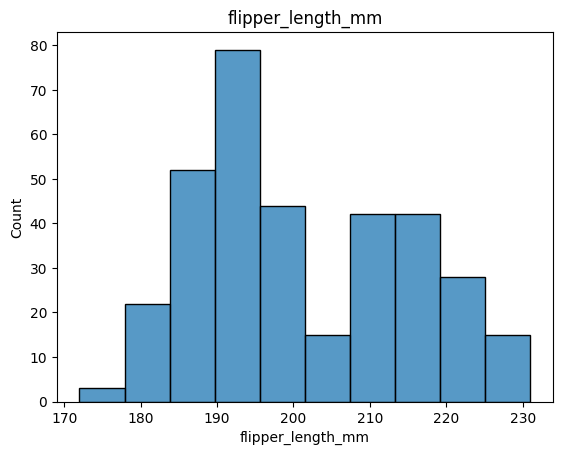

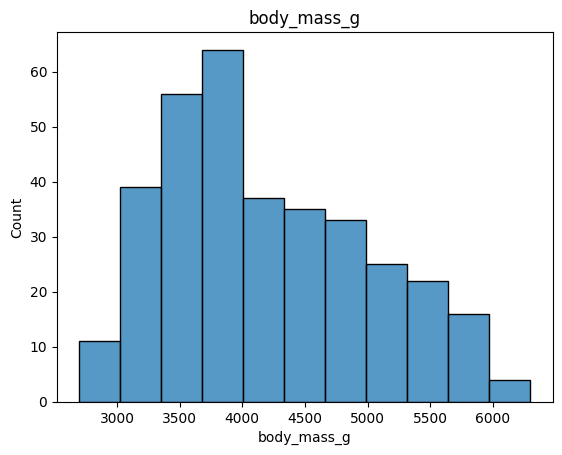

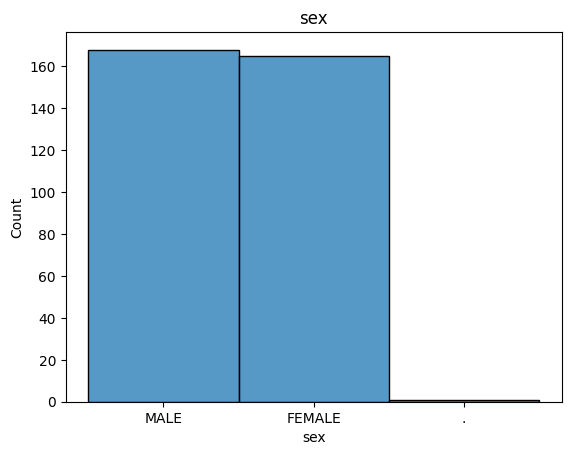

In [152]:
# Univariate Analysis
for col in df.columns:
    plt.figure()
    sns.histplot(df[col])
    plt.title(col)

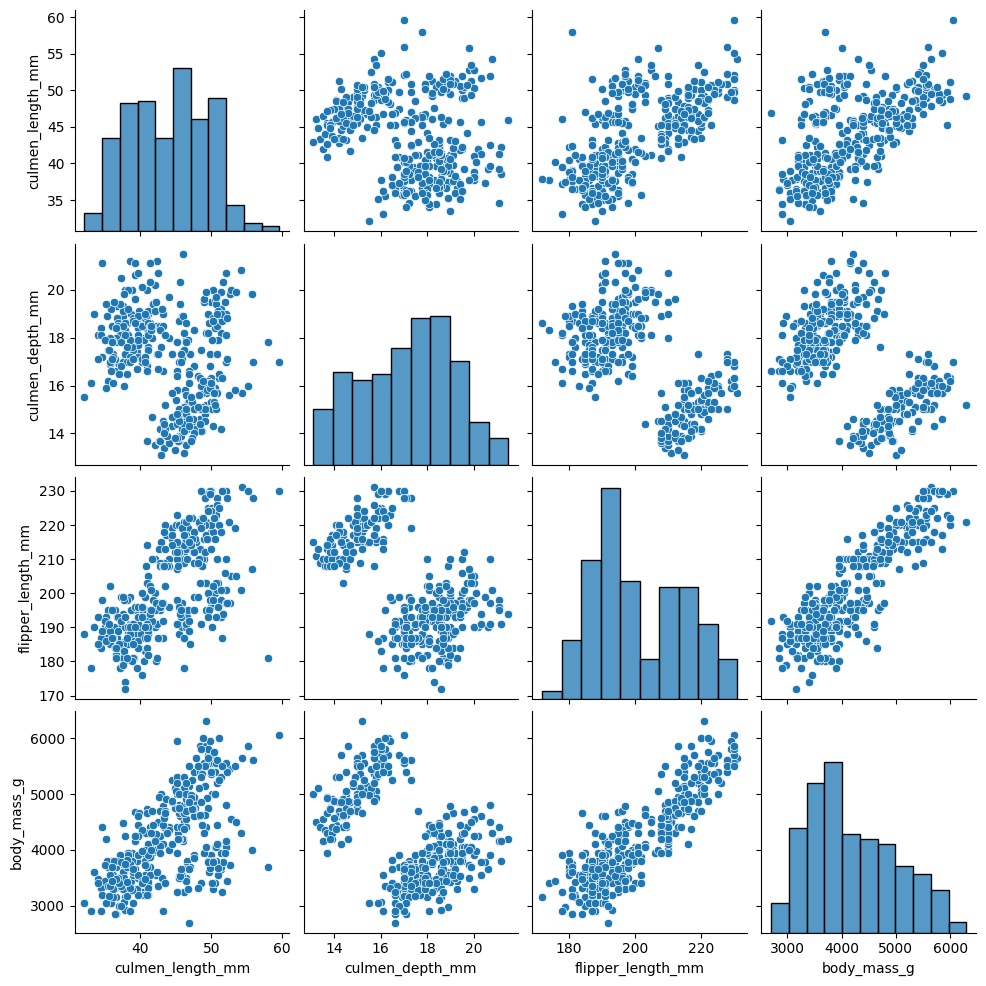

In [153]:
#bivariant analysis
sns.pairplot(df)

<ipython-input-154-c687143bd112>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

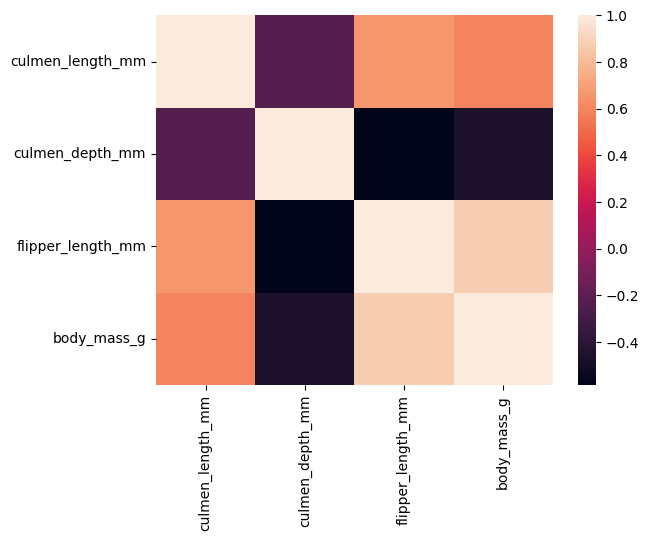

In [154]:
#multivariant analysis
sns.heatmap(df.corr())

In [155]:
# Descriptive statistics
print(df.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [156]:
# Handling missing values
print(df.isnull().sum())
#There are some missing values

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [157]:
#We initialize the mean values to the corresponding variable
culmen_length_mean=43.921930
culmen_depth_mean=17.151170 
flipper_length_mean= 200.915205
body_mass_mean=4201.754386

In [158]:
df['culmen_length_mm'].fillna(culmen_length_mean, inplace=True)
df['culmen_depth_mm'].fillna(culmen_depth_mean, inplace=True)
df['flipper_length_mm'].fillna(flipper_length_mean, inplace=True)
df['body_mass_g'].fillna(body_mass_mean, inplace=True)

In [159]:
#For catagorical column we use mode
column_mode = df['sex'].mode().iloc[0]
df['sex'].fillna(column_mode, inplace=True)


In [160]:
#checking for null values
print(df.isnull().sum())
print(df.head())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen          39.10000         18.70000         181.000000   
1  Adelie  Torgersen          39.50000         17.40000         186.000000   
2  Adelie  Torgersen          40.30000         18.00000         195.000000   
3  Adelie  Torgersen          43.92193         17.15117         200.915205   
4  Adelie  Torgersen          36.70000         19.30000         193.000000   

   body_mass_g     sex  
0  3750.000000    MALE  
1  3800.000000  FEMALE  
2  3250.000000  FEMALE  
3  4201.754386    MALE  
4  3450.000000  FEMALE  


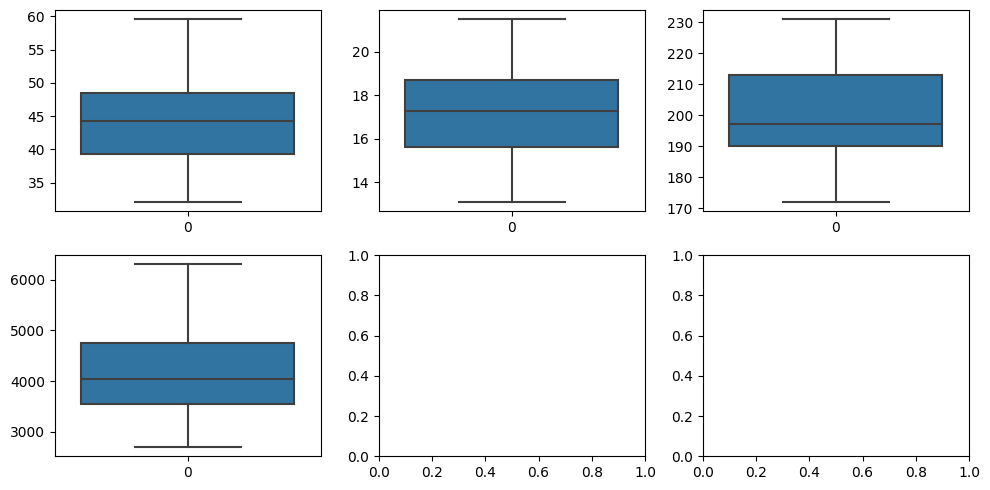

In [161]:
fig, axis = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['culmen_length_mm'], ax = axis[0,0])
plt2 = sns.boxplot(df['culmen_depth_mm'], ax = axis[0,1])
plt3 = sns.boxplot(df['flipper_length_mm'], ax = axis[0,2])
plt1 = sns.boxplot(df['body_mass_g'], ax = axis[1,0])

plt.tight_layout()
#thank god there are no outliers 

In [162]:
print(df['species'].value_counts())
print(df['island'].value_counts())
df.head()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [163]:
# Perform encoding using pandas' get_dummies() method
species = pd.get_dummies(df['species'])
species = pd.get_dummies(df['species'],drop_first=True)
# Merge the species status 
df = pd.concat([df, species], axis = 1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Chinstrap,Gentoo
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,0,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,0,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,0,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE,0,0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,0,0


In [164]:
# Perform encoding using pandas' get_dummies() method
island = pd.get_dummies(df['island'])
island = pd.get_dummies(df['island'],drop_first=True)
# Merge the island status
df = pd.concat([df, island], axis = 1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Chinstrap,Gentoo,Dream,Torgersen
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,0,0,0,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,0,0,0,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,0,0,0,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE,0,0,0,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,0,0,0,1


In [165]:
# Perform encoding using pandas' get_dummies() method
sex=pd.get_dummies(df['sex'])
df=pd.concat([df,sex],axis = 1)
# Merge the sex status
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Chinstrap,Gentoo,Dream,Torgersen,.,FEMALE,MALE
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,0,0,0,1,0,0,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,0,0,0,1,0,1,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,0,0,0,1,0,1,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE,0,0,0,1,0,0,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,0,0,0,1,0,1,0


In [166]:
# Drop 'sex' as we have created the dummies for it
df.drop(['sex'], axis = 1, inplace = True)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Chinstrap,Gentoo,Dream,Torgersen,.,FEMALE,MALE
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,0,0,0,1,0,0,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,0,0,0,1,0,1,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,0,0,0,1,0,1,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,0,0,0,1,0,0,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,0,0,0,1,0,1,0


In [167]:
# Drop 'island' as we have created the dummies for it
df.drop(['island'], axis = 1, inplace = True)
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Chinstrap,Gentoo,Dream,Torgersen,.,FEMALE,MALE
0,Adelie,39.10000,18.70000,181.000000,3750.000000,0,0,0,1,0,0,1
1,Adelie,39.50000,17.40000,186.000000,3800.000000,0,0,0,1,0,1,0
2,Adelie,40.30000,18.00000,195.000000,3250.000000,0,0,0,1,0,1,0
3,Adelie,43.92193,17.15117,200.915205,4201.754386,0,0,0,1,0,0,1
4,Adelie,36.70000,19.30000,193.000000,3450.000000,0,0,0,1,0,1,0


In [168]:
# Scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Applying scaler to all columns except the Categorical ones
scale_col = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_scaled = scaler.fit_transform(df[scale_col])

In [169]:
# Perform clustering algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [170]:
# Add cluster data to the dataset
df['cluster'] = clusters
df.head()
df.drop(['species'], axis=1, inplace=True)
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
Chinstrap              uint8
Gentoo                 uint8
Dream                  uint8
Torgersen              uint8
.                      uint8
FEMALE                 uint8
MALE                   uint8
cluster                int32
dtype: object

In [171]:
# Split the data into dependent and independent variables
X = df.drop(['culmen_length_mm'], axis=1)
y = df['culmen_length_mm']

In [172]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [173]:
# Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [174]:
# predict the model
y_pred = model.predict(X_test)


In [175]:
# Measure the performance using Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.5442982241325114
Mean Squared Error: 3.4639797347351533
Root Mean Squared Error: 1.861176975662216
R2 Score: 0.8891776536968962


In [176]:
# We have found that the r2 score is about 88